In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import numpy as np
import scvelo as scv
from tqdm.notebook import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [3]:
!pip install mousipy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
from mousipy import translate

# Humanizing mouse scRNA-seq data

In [2]:
adata = scv.datasets.pancreas()  # mouse scRNA-seq dataset

In [4]:
humanized_adata = translate(adata)

100%|██████████| 27998/27998 [00:36<00:00, 774.90it/s]


Found direct orthologs for 16787 genes.
Found multiple orthologs for 781 genes.
Found no orthologs for 8234 genes.
Found no index in biomart for 2196 genes.


100%|██████████| 781/781 [01:09<00:00, 11.18it/s]


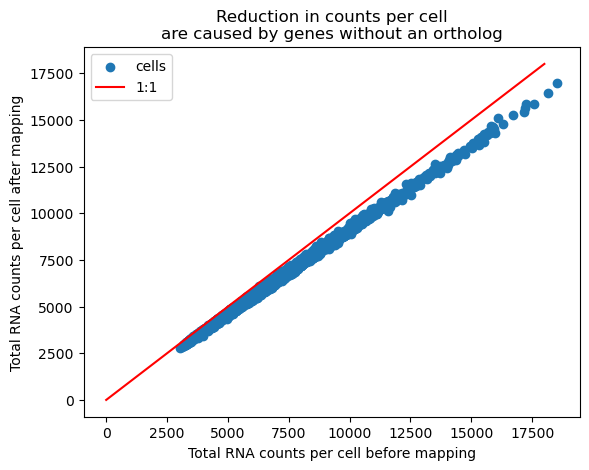

In [8]:
# Minimal loss in counts
counts_per_cell_after = np.ravel(np.sum(humanized_adata.X, axis=1))
counts_per_cell_before = np.ravel(np.sum(adata.X, axis=1))

pl.scatter(counts_per_cell_before, counts_per_cell_after, label='cells')
pl.title('Reduction in counts per cell\nare caused by genes without an ortholog')
pl.xlabel('Total RNA counts per cell before mapping')
pl.ylabel('Total RNA counts per cell after mapping')
pl.plot([0,18000], [0,18000], c='r', label='1:1')
pl.legend()
pl.show()

In [9]:
mcl = np.median(counts_per_cell_before - counts_per_cell_after)
mc = np.median(counts_per_cell_before)
print(f'A median cell lost {int(mcl)} of {int(mc)} counts ({np.round(100*mcl/mc,2)}%) during the mapping process.')
print(f'Mousipy could map {adata.n_vars} to {humanized_adata.n_vars} genes.')

A median cell lost 459 of 6194 counts (7.41%) during the mapping process.
Mousipy could map 27998 to 17450 genes.


In [10]:
humanized_adata.shape

(3696, 17450)

In [11]:
adata.shape

(3696, 27998)

# Mousifying human scRNA-seq data

In [12]:
human_data = sc.datasets.pbmc3k()

In [13]:
translated_human_data = translate(human_data)

100%|██████████| 32738/32738 [00:52<00:00, 626.88it/s]


Found direct orthologs for 15560 genes.
Found multiple orthologs for 816 genes.
Found no orthologs for 3088 genes.
Found no index in biomart for 13274 genes.


100%|██████████| 816/816 [01:03<00:00, 12.94it/s]


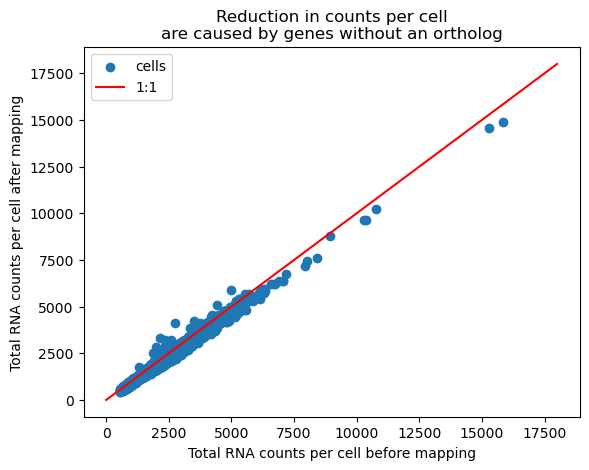

In [14]:
# Minimal loss in counts
counts_per_cell_after = np.ravel(np.sum(translated_human_data.X, axis=1))
counts_per_cell_before = np.ravel(np.sum(human_data.X, axis=1))

pl.scatter(counts_per_cell_before, counts_per_cell_after, label='cells')
pl.title('Reduction in counts per cell\nare caused by genes without an ortholog')
pl.xlabel('Total RNA counts per cell before mapping')
pl.ylabel('Total RNA counts per cell after mapping')
pl.plot([0,18000], [0,18000], c='r', label='1:1')
pl.legend()
pl.show()

# (Old)

In [5]:
# a test for dense matrix
# adata.X = adata.X.A.copy()  # make dense
# humanized_adata = translate(adata)  # check if this throws error on ".A"